## **Flight Price Prediction**
In this notebook, we aim to explore the dataset of flight prices across India on the basis of some factors such as source, destination, duration of flight, days left to fly etc. We will take a look at how these factors or features impact the price or what is the correlation of these features with the price

In [1]:
# import essential libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [27]:
# read the data in csv format using pandas 
path = "D:/flight-price-prediction\data\Clean_Dataset.csv"
data = pd.read_csv(path)

print(f"Shape of data {data.shape}")
data.head()

Shape of data (300153, 12)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [28]:
# print the number of columns and the names of the columns 
print(f"There are {len(data.columns)} in this dataset")
print(f"The name of the columns are {list(data.columns)}")

There are 12 in this dataset
The name of the columns are ['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [29]:
# remove the unnecessary columns
data = data.drop(columns="Unnamed: 0")
# print the number of columns and the names of the columns 
print(f"There are {len(data.columns)} in this dataset")
print(f"The name of the columns are {list(data.columns)}")

There are 11 in this dataset
The name of the columns are ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [30]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [31]:
# basic statistics about the data
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [32]:
# get the data types of each column
data.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

## EDA

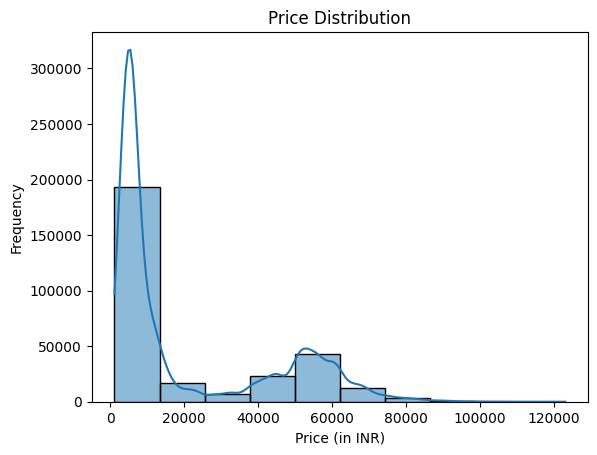

In [33]:
# price distribution
sns.histplot(
    data=data,
    x="price",
    kde=True,
    bins=10
)
plt.xlabel("Price (in INR)")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

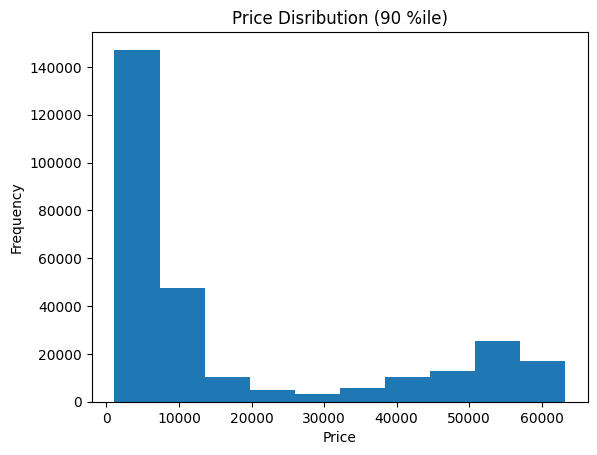

In [34]:
# we can see the price is distribution is right skewed, as there are quite a few outliers 
# look the distribution of the price till 90 %ile
ninty_percentile = data["price"].quantile(0.95)
data["price"][data["price"] < ninty_percentile].plot(kind="hist",
                                           bins=10)
plt.xlabel("Price")
plt.title("Price Disribution (90 %ile)")
plt.show()

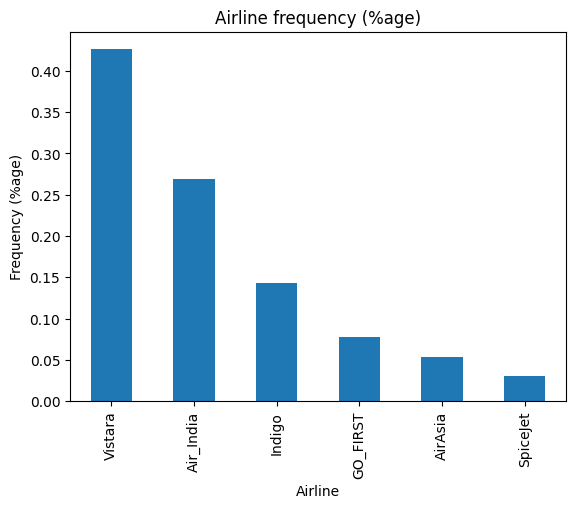

In [35]:
# how many airline companies are there
data["airline"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Airline")
plt.ylabel("Frequency (%age)")
plt.title("Airline frequency (%age)")
plt.show()

In [36]:
# what is the mean and median price of each airline
mean_median_price_by_airline = data.groupby("airline")["price"].agg(["mean","median"])
mean_median_price_by_airline

,mean,median
airline,,
AirAsia,4091.072742,3276.0
Air_India,23507.019112,11520.0
GO_FIRST,5652.007595,5336.0
Indigo,5324.216303,4453.0
SpiceJet,6179.278881,5654.0
Vistara,30396.536302,15543.0


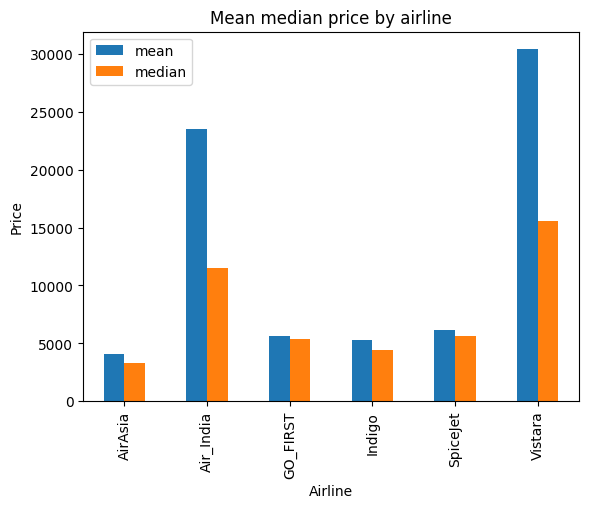

In [37]:
mean_median_price_by_airline.plot(kind="bar",
                                 xlabel="Airline",
                                 ylabel="Price",
                                 title="Mean median price by airline")
plt.show()

In [38]:
# what is the price distribution for each class in each airline
airline_class_price = data.groupby(["airline","class"])["price"].agg(["mean","median"])
airline_class_price

mean   median
airline   class                          
AirAsia   Economy    4091.072742   3276.0
Air_India Business  47131.039212  49613.0
          Economy    7313.682169   6082.0
GO_FIRST  Economy    5652.007595   5336.0
Indigo    Economy    5324.216303   4453.0
SpiceJet  Economy    6179.278881   5654.0
Vistara   Business  55477.027777  56588.0
          Economy    7806.943645   6461.0

In [39]:
data["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [40]:
# what is the mean, median, maximum and minimum price for each route
price_by_routes = data.groupby(["source_city","destination_city"])["price"].agg(["min","max","median","mean"])
price_by_routes

min     max   median          mean
source_city destination_city                                     
Bangalore   Chennai           1603   90720   9241.0  23321.850078
            Delhi             2723  111883   7164.0  17723.313972
            Hyderabad         1694   83239   7813.0  21226.121192
            Kolkata           3026  105168   8112.0  23500.061229
            Mumbai            2150  103819   7113.0  23128.618672
Chennai     Bangalore         1443  107597  10469.0  25081.850454
            Delhi             2051  103683   7352.0  18981.863948
            Hyderabad         1105   92752   7373.0  21591.345404
            Kolkata           2359  104624   8394.0  22669.932407
            Mumbai            1830  114704   8233.0  22765.849647
Delhi       Bangalore         3090   85353   6642.0  17880.216315
            Chennai           1998  104466   7425.0  19369.881354
            Hyderabad         2022  114507   6109.0  17347.288379
            Kolkata           2480  117307   7084.0  20566.409418
            Mumbai            2281   95657   7262.0  19355.829812
Hyderabad   Bangalore         1755   97767   7091.0  21347.177998
            Chennai           1543   95208   7702.0  21848.065989
            Delhi             2200   86203   6138.0  17243.945685
            Kolkata           2056   97381   7767.0  20823.893201
            Mumbai            2250  115211   6633.0  20080.865759
Kolkata     Bangalore         3465  105638   8111.0  22744.808428
            Chennai           2966   95183   8589.0  23660.361040
            Delhi             2994  123071   6723.0  19422.354559
            Hyderabad         2436  114705   8467.0  21500.011397
            Mumbai            3379  110936   7958.0  22078.883579
Mumbai      Bangalore         2074  114523   7192.0  23147.873807
            Chennai           1890  111964   8148.0  22781.899112
            Delhi             2336  111437   6300.0  18725.320008
            Hyderabad         2105   99677   7584.0  21004.046705
            Kolkata           2835  100909   7518.0  22379.146723

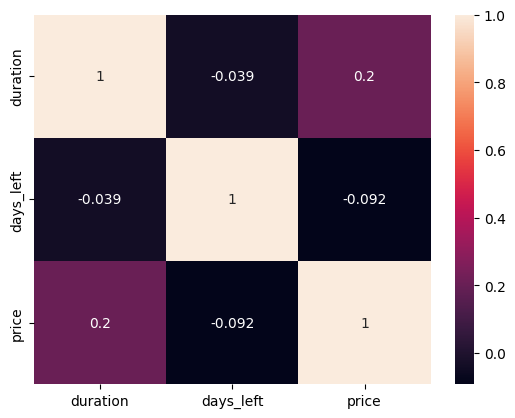

In [41]:
# we can see here that the most expensive tickets are from mumbai
# now we will take a look at the correlation between numerical features
corr = data.select_dtypes("number").corr()
sns.heatmap(corr,annot=True);

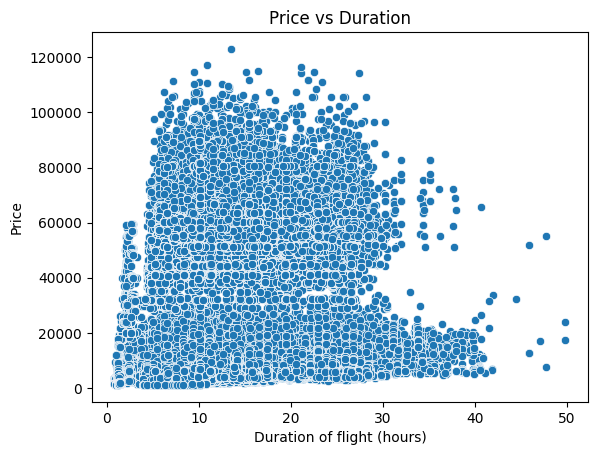

In [42]:
# plot the relation between the duration of the flight and price of the flight
sns.scatterplot(
    data=data,
    x="duration",
    y="price"
)
plt.xlabel("Duration of flight (hours)")
plt.ylabel("Price")
plt.title("Price vs Duration")
plt.show()

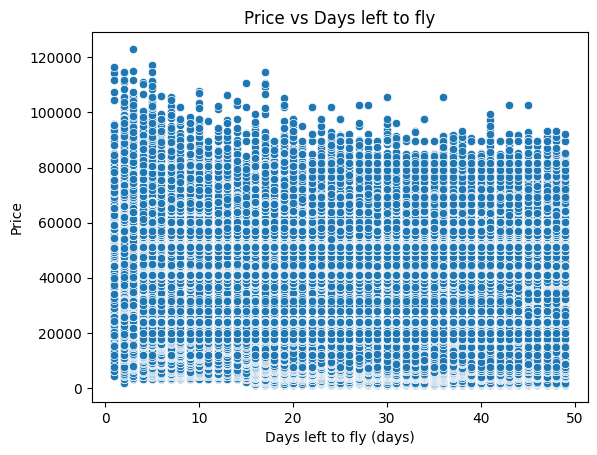

In [43]:
# plot the relation between the days left to fly and price of the flight
sns.scatterplot(
    data=data,
    x="days_left",
    y="price"
)
plt.xlabel("Days left to fly (days)")
plt.ylabel("Price")
plt.title("Price vs Days left to fly")
plt.show()

In [45]:
# look for features with high cardinality 
cardinality_threshold = 100
high_cardinality_features = [col for col in data.select_dtypes("object") if data[col].nunique()>cardinality_threshold]
high_cardinality_features

['flight']